<a href="https://colab.research.google.com/github/rainnn99/DataAnalysis_Airbnb/blob/main/DataAnalysis_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)
df = pd.read_csv('/content/drive/MyDrive/project/Airbnb/Airbnb_list_in_tokyo.csv', encoding='cp949')
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,within a day,100%,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,"[""Microwave"", ""Hangers"", ""Kitchen"", ""Fire exti...","12,000.00",0,39,174,4.77,4.74,4.92,4.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shibuya District,4,"['email', 'phone']",4,1 bath,NaN,"[""First aid kit"", ""Stove"", ""Hangers"", ""Bed lin...","9,264.00",180,2,2,1125,1125,2015-04-05,2021-12-30,4.62,4.3,M130005396,t,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,within an hour,100%,t,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Essent...","7,419.00",90,90,61,4.8,4.9,4.85,4.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.loc[:, ~df.columns.str.contains('Unnamed:')]
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,within a day,100%,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,"[""Microwave"", ""Hangers"", ""Kitchen"", ""Fire exti...","12,000.00",0,39,174,4.77,4.74,4.92,4.84,4.83,4.53,4.79,f
1,Shibuya District,4,"['email', 'phone']",4,1 bath,NaN,"[""First aid kit"", ""Stove"", ""Hangers"", ""Bed lin...","9,264.00",180,2,2,1125,1125,2015-04-05,2021-12-30,4.62,4.3,M130005396,t,4,4,0,0,NaN
2,within an hour,100%,t,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Essent...","7,419.00",90,90,61,4.8,4.9,4.85,4.93,4.87,4.61,4.77,9


In [4]:
df.shape

(13356, 24)

In [5]:
column_name = 'host_is_superhost'
df = df[df[column_name].isin(['t', 'f'])]

In [6]:
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,within a day,100%,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,"[""Microwave"", ""Hangers"", ""Kitchen"", ""Fire exti...","12,000.00",0,39,174,4.77,4.74,4.92,4.84,4.83,4.53,4.79,f
2,within an hour,100%,t,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Essent...","7,419.00",90,90,61,4.8,4.9,4.85,4.93,4.87,4.61,4.77,9
3,within an hour,100%,t,Kita Ku,35.73844,139.76917,Private room,1,1 shared bath,NaN,1,"[""Luggage dropoff allowed"", ""Private entrance""...","8,902.00",0,116,248,4.98,4.96,4.92,4.98,4.98,4.84,4.91,f


In [7]:
df.shape

(6550, 24)

In [8]:
df.isnull().sum()

host_response_time              332
host_response_rate              332
host_is_superhost                 0
neighbourhood_cleansed           28
latitude                         11
longitude                         3
room_type                         0
accommodates                      0
bathrooms_text                   14
bedrooms                       1045
beds                            276
amenities                         0
price                             0
availability_90                   3
availability_365                  3
number_of_reviews                 3
review_scores_rating            655
review_scores_accuracy          656
review_scores_cleanliness       656
review_scores_checkin           656
review_scores_communication     657
review_scores_location          695
review_scores_value             770
instant_bookable                117
dtype: int64

In [9]:
unique_values = df['host_response_time'].unique()
print(unique_values)

['within a day' 'within an hour' 'within a few hours' nan " 'phone'"
 'a few days or more' '1' '4' '28'
 'From the ryokan, walk about 10 minutes, there are convenience stores, supermarkets. Walking to the Sensoji Temple, there will be commercial facilities, various shops, restaurants and so on. You can also take a water bus tour nearby.<br />From Thunder gate to Sensoji Temple, there is a street called Nakamise, which has many souvenirs and snack shops. For example, the famous [?룔걡?볝걮], [雅뷴숱??, [?귙겒??, [?귙걩?얇굯?섅굝?? and so on.<br />You can take a water bus to see the scenery of Tokyo?셲 Sumida River. Especially the cherry blossom season, very beautiful??,https://a0.muscache.com/pictures/c4fef331-166a-4fdc-8c5c-54f1a7d087a4.jpg,224733946,https://www.airbnb.com/users/show/224733946,?듐겗若?2018-11-07,,",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/cdb3961a-07ef-4853-ad9e-3afd555259a7.jpg?aki_policy=profile_small,https://a0.muscache.com/im/pictures/user/cdb3961a-07ef-485

In [10]:
df = df[df['host_response_time'].isin(['within an hour', 'within a few hours', 'within a day', 'a few days or more'])]
unique_values = df['host_response_time'].unique()
print(unique_values)

['within a day' 'within an hour' 'within a few hours' 'a few days or more']


In [11]:
df.shape
df.isnull().sum()

host_response_time               0
host_response_rate               0
host_is_superhost                0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
room_type                        0
accommodates                     0
bathrooms_text                  14
bedrooms                       975
beds                           265
amenities                        0
price                            0
availability_90                  0
availability_365                 0
number_of_reviews                0
review_scores_rating           571
review_scores_accuracy         572
review_scores_cleanliness      572
review_scores_checkin          572
review_scores_communication    572
review_scores_location         572
review_scores_value            572
instant_bookable                 0
dtype: int64

값 변환, 결측치 처리

In [12]:
#특정 값들을 변환하는 작업 No.1 host_response_time 결측치는 3으로 대체
df['host_response_time'].fillna("a few days or more", inplace=True)
change_val = {"within an hour" : 0, "within a few hours" : 1, "within a day" : 2, "a few days or more" : 3}
df['host_response_time'] = df['host_response_time'].map(change_val)
df.isnull().sum()

host_response_time               0
host_response_rate               0
host_is_superhost                0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
room_type                        0
accommodates                     0
bathrooms_text                  14
bedrooms                       975
beds                           265
amenities                        0
price                            0
availability_90                  0
availability_365                 0
number_of_reviews                0
review_scores_rating           571
review_scores_accuracy         572
review_scores_cleanliness      572
review_scores_checkin          572
review_scores_communication    572
review_scores_location         572
review_scores_value            572
instant_bookable                 0
dtype: int64

In [13]:
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2,100%,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,"[""Microwave"", ""Hangers"", ""Kitchen"", ""Fire exti...","12,000.00",0,39,174,4.77,4.74,4.92,4.84,4.83,4.53,4.79,f
2,0,100%,t,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Essent...","7,419.00",90,90,61,4.8,4.9,4.85,4.93,4.87,4.61,4.77,9
3,0,100%,t,Kita Ku,35.73844,139.76917,Private room,1,1 shared bath,NaN,1,"[""Luggage dropoff allowed"", ""Private entrance""...","8,902.00",0,116,248,4.98,4.96,4.92,4.98,4.98,4.84,4.91,f


In [14]:
#결측값 처리
# bedrooms_text, bedrooms, beds => 0 이유 : 직접 데이터셋에 가서 확인했을때 값이 없는 경우는 보유하고 있지않은 0으로 추정됨.
#review_ => 평균대치

target_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
for column in target_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# NaN 값을 열의 평균값으로 채웁니다.
for column in target_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
df.isnull().sum()

host_response_time               0
host_response_rate               0
host_is_superhost                0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
room_type                        0
accommodates                     0
bathrooms_text                  14
bedrooms                       975
beds                           265
amenities                        0
price                            0
availability_90                  0
availability_365                 0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
instant_bookable                 0
dtype: int64

In [15]:
target_columns = ['bathrooms_text', 'bedrooms', 'beds']
for column in target_columns:
  df[column].fillna("0", inplace=True)
df.isnull().sum()

host_response_time             0
host_response_rate             0
host_is_superhost              0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

In [16]:
df.dtypes

host_response_time               int64
host_response_rate              object
host_is_superhost               object
neighbourhood_cleansed          object
latitude                        object
longitude                       object
room_type                       object
accommodates                    object
bathrooms_text                  object
bedrooms                        object
beds                            object
amenities                       object
price                           object
availability_90                 object
availability_365                object
number_of_reviews               object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                object
dtype: object

In [17]:
unique_values = df['bathrooms_text'].unique()
print(unique_values)

['1 bath' '1 shared bath' '1.5 shared baths' '1.5 baths' '2 baths'
 '2 shared baths' '1 private bath' 'Shared half-bath' '0 shared baths'
 '3 shared baths' '2.5 baths' '3 baths' 'Half-bath' '5.5 baths' '0'
 '19.5 baths' '2.5 shared baths' '4 baths' '4 shared baths'
 '5 shared baths' '5 baths' '0 baths' '6 baths' '7 baths' '11 baths'
 '3.5 shared baths' '3.5 baths' '10 baths' '6 shared baths'
 'Private half-bath']


In [18]:
column_name = 'instant_bookable'
df[column_name] = np.where(df[column_name] == 'f', df[column_name], 't')
unique_values = df['instant_bookable'].unique()
print(unique_values)

['f' 't']


In [19]:
change_val = {"f" : 0, "t" : 1}
df['instant_bookable'] = df['instant_bookable'].map(change_val)
unique_values = df['instant_bookable'].unique()
print(unique_values)

[0 1]


In [20]:
df['host_is_superhost'] = df['host_is_superhost'].map(change_val)
unique_values = df['host_is_superhost'].unique()
print(unique_values)

[1 0]


In [21]:
#amenities변수를 개수로 변환
df['amenities'] = df['amenities'].apply(lambda x: x.count(','))
df['amenities'].astype(int)
df['amenities'] = df['amenities'] + 1

In [22]:
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2,100%,1,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,21,"12,000.00",0,39,174,4.77,4.74,4.92,4.84,4.83,4.53,4.79,0
2,0,100%,1,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,14,"7,419.00",90,90,61,4.80,4.90,4.85,4.93,4.87,4.61,4.77,1
3,0,100%,1,Kita Ku,35.73844,139.76917,Private room,1,1 shared bath,0,1,23,"8,902.00",0,116,248,4.98,4.96,4.92,4.98,4.98,4.84,4.91,0


In [23]:
column_name = 'host_response_rate'
df[column_name] = df[column_name].apply(lambda x: x.replace('%', ''))
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2,100,1,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,21,"12,000.00",0,39,174,4.77,4.74,4.92,4.84,4.83,4.53,4.79,0
2,0,100,1,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,14,"7,419.00",90,90,61,4.80,4.90,4.85,4.93,4.87,4.61,4.77,1
3,0,100,1,Kita Ku,35.73844,139.76917,Private room,1,1 shared bath,0,1,23,"8,902.00",0,116,248,4.98,4.96,4.92,4.98,4.98,4.84,4.91,0


In [24]:
column_name = ['host_response_time', 'host_response_rate','host_is_superhost','accommodates','bedrooms','beds','availability_90','availability_365',
               'number_of_reviews','instant_bookable']
df[column_name].astype(int)

,host_response_time,host_response_rate,host_is_superhost,accommodates,bedrooms,beds,availability_90,availability_365,number_of_reviews,instant_bookable
0,2,100,1,2,1,2,0,39,174,0
2,0,100,1,2,1,1,90,90,61,1
3,0,100,1,1,0,1,0,116,248,0
4,0,100,1,6,2,4,20,166,194,1
5,0,100,1,2,1,1,77,77,128,1
...,...,...,...,...,...,...,...,...,...,...
13345,0,100,0,2,1,1,69,69,0,1
13346,0,100,0,3,1,3,65,65,0,1
13349,0,100,0,9,2,1,90,270,0,1
13350,0,100,0,2,1,1,75,76,0,1


In [25]:
#int로 변환되지 않는 값들 발견하여 처리
column_names = ['host_response_rate','accommodates', 'bedrooms', 'beds', 'availability_90', 'availability_365', 'number_of_reviews']

for col in column_names:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
df.dtypes

host_response_time               int64
host_response_rate               Int64
host_is_superhost                int64
neighbourhood_cleansed          object
latitude                        object
longitude                       object
room_type                       object
accommodates                     Int64
bathrooms_text                  object
bedrooms                         Int64
beds                             Int64
amenities                        int64
price                           object
availability_90                  Int64
availability_365                 Int64
number_of_reviews                Int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                 int64
dtype: object

In [26]:
column_names = ['latitude', 'longitude']
for col in column_names:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')
df.dtypes

host_response_time               int64
host_response_rate               Int64
host_is_superhost                int64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
room_type                       object
accommodates                     Int64
bathrooms_text                  object
bedrooms                         Int64
beds                             Int64
amenities                        int64
price                           object
availability_90                  Int64
availability_365                 Int64
number_of_reviews                Int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                 int64
dtype: object

In [27]:
column_name = 'price'
df[column_name] = df[column_name].apply(lambda x: float(x.replace(',', '')))

In [28]:
df.dtypes

host_response_time               int64
host_response_rate               Int64
host_is_superhost                int64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
room_type                       object
accommodates                     Int64
bathrooms_text                  object
bedrooms                         Int64
beds                             Int64
amenities                        int64
price                          float64
availability_90                  Int64
availability_365                 Int64
number_of_reviews                Int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                 int64
dtype: object

In [40]:
#리뷰 총점은 아래 리뷰값들의 평균이기 때문에 타 구간변수와의 비교를 위해 리뷰에 넣지 않고, 이 df에서 작업
cols = ['host_response_rate', 'accommodates','beds','amenities','availability_90','availability_365', 'review_scores_rating']
df_section = df[cols]
df_section.head(3)

,host_response_rate,accommodates,beds,amenities,availability_90,availability_365,review_scores_rating
0,100,2,2,21,0,39,4.77
2,100,2,1,14,90,90,4.80
3,100,1,1,23,0,116,4.98


In [41]:
cols=['number_of_reviews','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
df_sec_review = df[cols]
df_sec_review.head(3)

,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,174,4.74,4.92,4.84,4.83,4.53,4.79
2,61,4.90,4.85,4.93,4.87,4.61,4.77
3,248,4.96,4.92,4.98,4.98,4.84,4.91


In [42]:
df_section.describe()

,host_response_rate,accommodates,beds,amenities,availability_90,availability_365,review_scores_rating
count,6101.0,6101.0,6101.0,6101.000000,6101.0,6101.0,6101.000000
mean,99.030323,4.206851,2.452057,30.082773,41.395181,138.856745,4.674664
std,5.635185,2.884241,2.035796,10.157523,26.677959,99.941262,0.315553
min,0.0,1.0,0.0,1.000000,0.0,0.0,0.000000
25%,100.0,2.0,1.0,23.000000,19.0,60.0,4.580000
50%,100.0,3.0,2.0,29.000000,41.0,124.0,4.710000
75%,100.0,5.0,3.0,36.000000,63.0,202.0,4.870000
max,100.0,16.0,36.0,93.000000,90.0,365.0,5.000000


In [43]:
df_sec_review.describe()

,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,6101.0,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000
mean,43.353221,4.726616,4.652897,4.759132,4.800950,4.683813,4.618830
std,64.487688,0.288514,0.354662,0.289268,0.262346,0.283430,0.318961
min,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.0,4.660000,4.550000,4.700000,4.750000,4.590000,4.530000
50%,21.0,4.770000,4.710000,4.810000,4.840000,4.710000,4.650000
75%,57.0,4.890000,4.880000,4.930000,4.950000,4.860000,4.800000
max,2023.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: xlabel='review_scores_rating'>

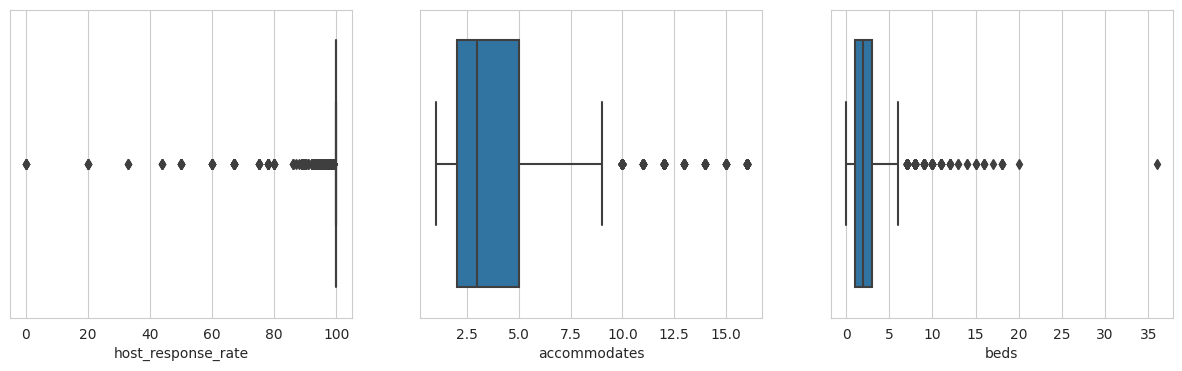

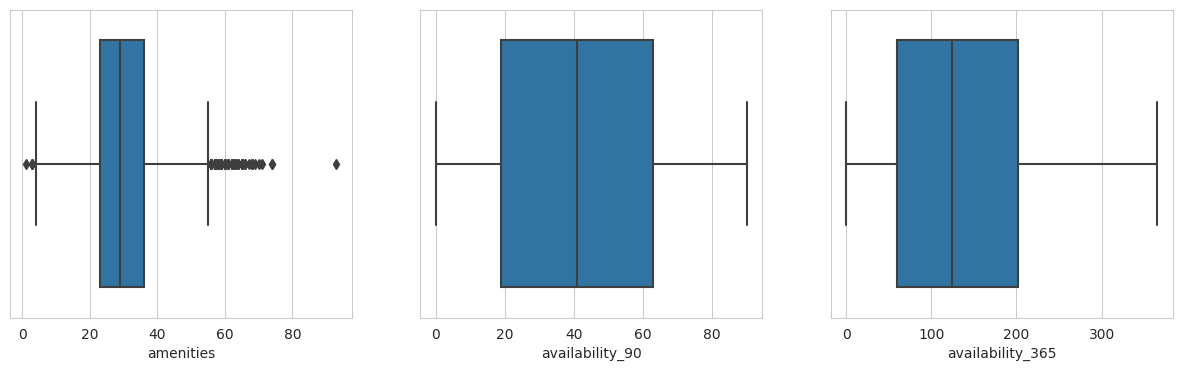

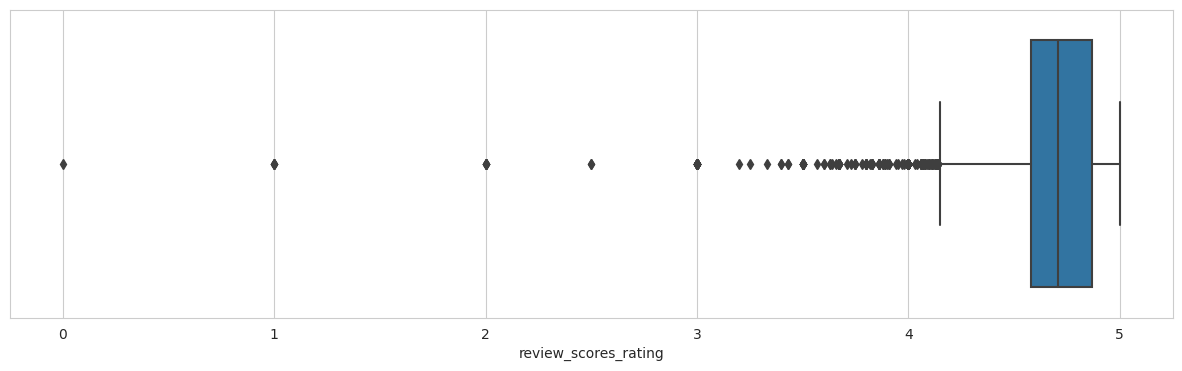

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.boxplot(ax=axes[0], x="host_response_rate", data=df_section)
sns.boxplot(ax=axes[1], x="accommodates", data=df_section)
sns.boxplot(ax=axes[2], x="beds", data=df_section)

fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.boxplot(ax=axes[0], x="amenities", data=df_section)
sns.boxplot(ax=axes[1], x="availability_90", data=df_section)
sns.boxplot(ax=axes[2], x="availability_365", data=df_section)

fig, axes = plt.subplots(1,1,figsize=(15,4))
sns.boxplot(ax=axes, x="review_scores_rating", data=df_section)

데이터 처리 단계